In [1]:
import pandas as pd
import matplotlib as mpl
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import os
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
# Save results to
outpath = '../../results/20220921_AnalysisOfCvCoverageResults'
os.makedirs(outpath, exist_ok=True)

# Import data
dataPath = '../../results/20220921_CvCoverageWeighted'
Data = {
    'FlagIp' : {
        'All3UTRs' : glob(f'{dataPath}/FlagIpFullTranscriptome/results/**/*_20_*.tsv'),
    }
}
smooth = 20

In [3]:
Data['FlagIp']['All3UTRs']

['../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_2_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/results/UUUU/LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_AGUUU_GUUUU_UGUUU_UUUUU.tsv',
 '../../results/20220921_CvCoverageWeighted/FlagIpFullTranscriptome/result

In [4]:
# Combine all coverages into one table
coverageCols = []
# COLUMNS: motifGroup, Region, Quantification, TranscriptGroup, Sample, Dataset, Coverage
rows = []

region = 'UTR3'
for dataset, filedict in Data.items():
    for quantification, samples in filedict.items():
        for s in samples:
            if coverageCols == []:
                coverageCols = pd.read_csv(s, sep='\t', index_col=0).T.columns.tolist()
            coverage = pd.read_csv(s, sep='\t', index_col=0).T.values.tolist()[0]
            sample = s.split('/')[-1].split('_GeneGroup_')[0]
            motifGroup = s.split('/')[-1].split('_20_')[-1].split('.')[0]
            consensus = s.split('/')[-2]
            row = [dataset, quantification, motifGroup, consensus, sample, region, s] + coverage
            rows.append(row)
DfCombined = pd.DataFrame(rows, columns=['Dataset', 'Quantification', 'MotifGroup', 'MotifConsensus', 'Sample', 'Region', 'Filepath'] + coverageCols)

In [5]:
DfCombined.head()

,Dataset,Quantification,MotifGroup,MotifConsensus,Sample,Region,Filepath,-305,-304,-303,...,296,297,298,299,300,301,302,303,304,305
0,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3_20...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.102776,0.142103,0.174676,...,0.253139,0.253826,0.254075,0.253878,0.253908,0.253714,0.222404,0.189611,0.154143,0.110867
1,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_AGUUU_...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101317,0.140355,0.172728,...,0.262916,0.262880,0.263148,0.263174,0.263429,0.263422,0.231623,0.197952,0.161670,0.117288
2,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_2_UTR3_20...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101815,0.141664,0.174422,...,0.254999,0.254947,0.254750,0.253978,0.254036,0.254113,0.222860,0.189956,0.154501,0.111586
3,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_AGUUU_GU...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101564,0.140966,0.173190,...,0.263081,0.263347,0.263727,0.263984,0.264343,0.264500,0.232285,0.198659,0.162208,0.117764
4,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.100105,0.138736,0.170666,...,0.261341,0.261156,0.261082,0.260569,0.259929,0.259720,0.227753,0.193975,0.158385,0.114941


In [6]:
DfCombined.tail()

,Dataset,Quantification,MotifGroup,MotifConsensus,Sample,Region,Filepath,-305,-304,-303,...,296,297,298,299,300,301,302,303,304,305
25,FlagIp,All3UTRs,GAGGG_AAGGG_AGGGG_GGGAA,AGGG-UGGG,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3_20...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.016897,0.030886,0.044256,...,0.066786,0.066349,0.066159,0.066366,0.066601,0.066611,0.054778,0.042301,0.029718,0.016037
26,FlagIp,All3UTRs,GAGGG_AAGGG_AGGGG_GGGAA,AGGG-UGGG,LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_GAGGG_AA...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.016726,0.030755,0.043896,...,0.065285,0.065387,0.065513,0.065515,0.065719,0.065526,0.053757,0.041497,0.028968,0.015618
27,FlagIp,All3UTRs,GAGGG_AAGGG_AGGGG_GGGAA,AGGG-UGGG,LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_GAGGG_AA...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.016683,0.030679,0.044142,...,0.066045,0.065789,0.065786,0.066091,0.066140,0.065991,0.054171,0.042011,0.029321,0.015826
28,FlagIp,All3UTRs,GAGGG_AAGGG_AGGGG_GGGAA,AGGG-UGGG,LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_GAGGG_...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.016566,0.030766,0.044014,...,0.065243,0.065320,0.065378,0.065736,0.065866,0.065790,0.053991,0.041709,0.029043,0.015703
29,FlagIp,All3UTRs,GAGGG_AAGGG_AGGGG_GGGAA,AGGG-UGGG,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_2_UTR3_20...,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.016323,0.030472,0.043757,...,0.065934,0.065949,0.065870,0.066018,0.066460,0.066193,0.054229,0.042077,0.029446,0.015794


In [7]:
DfCombined.shape

(30, 618)

In [8]:
# Add experimental condition
ExpConditionDict = {
    'iLIF' : [s for s in DfCombined.Sample.unique() if 'ilif' in s.lower()],
    'LIF-CHIR' : [s for s in DfCombined.Sample.unique() if 'lif-chir' in s.lower() and 'lin28a-wt' in s.lower()],
    'S200A' : [s for s in DfCombined.Sample.unique() if 's200a' in s.lower()],

}

ExpConditionRows = []
for k, v in ExpConditionDict.items():
    for val in v:
        ExpConditionRows.append([k, val])
DfExpCondition = pd.DataFrame(ExpConditionRows, columns=['Condition', 'Sample'])
print(DfExpCondition)

# Merge
DfCombined = DfCombined.merge(DfExpCondition, on='Sample')
DfCombined = DfCombined[['Sample', 'Condition'] + [c for c in DfCombined.columns if c not in ['Sample', 'Condition']]]
DfCombined.head()

   Condition                                             Sample
0       iLIF  LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_AGUUU_...
1       iLIF  LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_AGUUU_GU...
2       iLIF  LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_AGUUU_GU...
3       iLIF  LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_AAGGG_AG...
4       iLIF  LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_AAGGG_...
5       iLIF  LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_AAGGG_AG...
6       iLIF  LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_UGAUG_AU...
7       iLIF  LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_UGAUG_AU...
8       iLIF  LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_UGAUG_...
9       iLIF  LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_UGGGG_GU...
10      iLIF  LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_UGGGG_...
11      iLIF  LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_UGGGG_GU...
12      iLIF  LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_GAGGG_AA...
13      iLIF  LIN28A-WT_ESCiLIF0220626_MM_1_UTR3_20_GAGGG_AA...
14      iLIF  LIN28A-WT_ESCiLIF-OLD02206

,Sample,Condition,Dataset,Quantification,MotifGroup,MotifConsensus,Region,Filepath,-305,-304,...,296,297,298,299,300,301,302,303,304,305
0,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3_20...,LIF-CHIR,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.102776,0.142103,...,0.253139,0.253826,0.254075,0.253878,0.253908,0.253714,0.222404,0.189611,0.154143,0.110867
1,LIN28A-WT_ESCiLIF-OLD0220626_MM_UTR3_20_AGUUU_...,iLIF,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101317,0.140355,...,0.262916,0.262880,0.263148,0.263174,0.263429,0.263422,0.231623,0.197952,0.161670,0.117288
2,LIN28A-WT_ESC_LIF-CHIR-FGF0220626_MM_2_UTR3_20...,LIF-CHIR,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101815,0.141664,...,0.254999,0.254947,0.254750,0.253978,0.254036,0.254113,0.222860,0.189956,0.154501,0.111586
3,LIN28A-WT_ESCiLIF0220626_MM_2_UTR3_20_AGUUU_GU...,iLIF,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.101564,0.140966,...,0.263081,0.263347,0.263727,0.263984,0.264343,0.264500,0.232285,0.198659,0.162208,0.117764
4,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_UTR3...,S200A,FlagIp,All3UTRs,AGUUU_GUUUU_UGUUU_UUUUU,UUUU,UTR3,../../results/20220921_CvCoverageWeighted/Flag...,0.100105,0.138736,...,0.261341,0.261156,0.261082,0.260569,0.259929,0.259720,0.227753,0.193975,0.158385,0.114941


In [9]:
# Convert to %
DfCombined[[c for c in DfCombined.columns if isinstance(c, int)]] = DfCombined[[c for c in DfCombined.columns if isinstance(c, int)]] * 100

In [10]:
DfRawCoverage = DfCombined[[c for c in DfCombined.columns if isinstance(c, int)]]

In [11]:
# Smooth coverage and drop NaN
DfRawCoverage = DfCombined[[c for c in DfCombined.columns if isinstance(c, int)]]
DfSmooth = DfRawCoverage.rolling(smooth, win_type='triang', center=True, axis='columns').mean().dropna(axis='columns')
DfSmooth.head()

,-295,-294,-293,-292,-291,-290,-289,-288,-287,-286,...,287,288,289,290,291,292,293,294,295,296
0,22.893335,23.135316,23.267348,23.325365,23.340947,23.343735,23.348493,23.354682,23.361698,23.368975,...,25.363275,25.357758,25.355095,25.354989,25.356071,25.357788,25.343965,25.282206,25.138860,24.874578
1,22.713139,22.956314,23.089525,23.148492,23.164660,23.167421,23.171459,23.177022,23.183639,23.190815,...,26.359709,26.349540,26.340757,26.333760,26.328588,26.325007,26.306624,26.240368,26.091141,25.818786
2,22.963249,23.217893,23.359364,23.423763,23.442568,23.445684,23.448079,23.449475,23.449457,23.448333,...,25.538018,25.541045,25.544227,25.546115,25.546052,25.543599,25.522629,25.450960,25.295223,25.016743
3,22.798342,23.047370,23.185460,23.248672,23.268826,23.275412,23.282725,23.290707,23.299183,23.307809,...,26.483182,26.475204,26.466616,26.458052,26.449277,26.439791,26.413816,26.339299,26.182076,25.902500
4,22.487097,22.719061,22.838798,22.881918,22.879922,22.863212,22.847953,22.835277,22.826031,22.821333,...,26.087128,26.086248,26.087517,26.090353,26.093031,26.094478,26.078611,26.012145,25.861092,25.586021


In [12]:
DfCombinedSmooth = DfCombined[[c for c in DfCombined.columns if isinstance(c, str)]].join(DfSmooth)

In [13]:
DfCombinedSmooth.to_csv(f'{outpath}/SmoothCoveragesAll3UTRs_{smooth}.tsv', sep='\t')

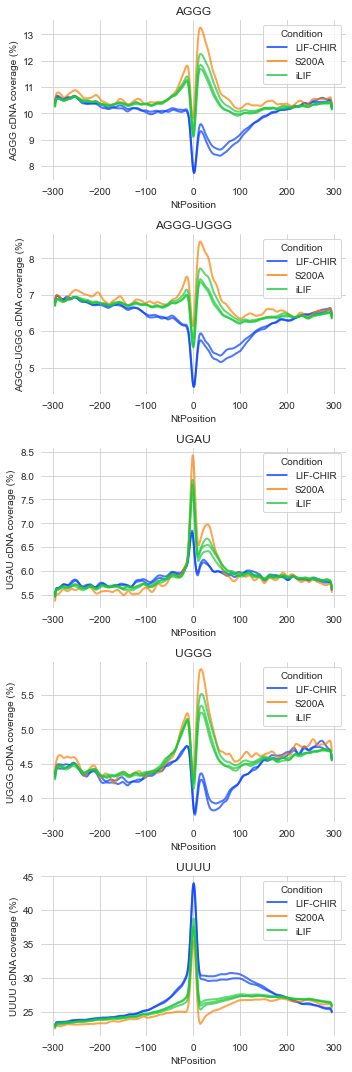

In [14]:
# Plot coverages
sns.set_style("whitegrid")

fig, axs = plt.subplots(len(DfCombinedSmooth.MotifConsensus.unique()), figsize=(5,15))
i = 0
for consensus, df in DfCombinedSmooth.groupby('MotifConsensus'):
    ax = axs[i]
    dfMelt = df.melt(id_vars=[c for c in df.columns if isinstance(c, str)], value_name='Coverage', var_name='NtPosition')
    # print(dfMelt.head())
    sns.lineplot(
        data=dfMelt, x='NtPosition', y='Coverage', hue='Condition',
        ax=ax, lw=2, estimator=None, alpha=0.7, units='Sample', ci=None, hue_order=sorted(dfMelt.Condition.unique()), palette='bright',
        )
    ax.set_title(consensus)
    ax.set_ylabel(f'{consensus} cDNA coverage (%)')
    i +=1
plt.tight_layout()
sns.despine(left=True, bottom=True)
fig.savefig(f'{outpath}/CoveragePlots_FullTranscriptome.pdf', bbox_inches='tight')
fig.savefig(f'{outpath}/CoveragePlots_FullTranscriptome.png', bbox_inches='tight')
